#### Wine Quality Project | Machine Learning

In [1]:
#libraries used 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

# URLs for the Red and White wine datasets
red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

# Load the data 
red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

# Adding a column for each whine to distinguish them before merging
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine them into one "Master" dataframe
df = pd.concat([red_wine, white_wine])


In [3]:
df.shape

(6497, 13)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [11]:
bins = [0, 4, 6, 7, 8, 10]
choices = ['Low', 'Medium Low', 'Medium High', 'High', 'Very High']

df['quality_category'] = pd.cut(df['quality'], bins=bins, labels=choices, right=False)

# Verify the distribution of the new quality categories
print(df['quality_category'].value_counts())

quality_category
Medium High    2836
Medium Low     2354
High           1079
Very High       198
Low              30
Name: count, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   object  
 13  quality_category      6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage

In [12]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type quality_category  
0         9.4        5    red       Medium Low  
1         9.8        5    red       Medium Low  
2         9.8        5    red       Medium Low  
3         9.8        6    red      Medium High  
4         9.4        5    red       Medium Low  
...       ...      ...    ...              ...  
4893     11.2        6  white      Medium High  
4894      9.6        5  white       Medium Low  
4895      9.4        6  white      Medium High  
4896     12.8        7  white             High  
4897     11.8        6  white      Medium High  

[6497 rows x 14 columns]

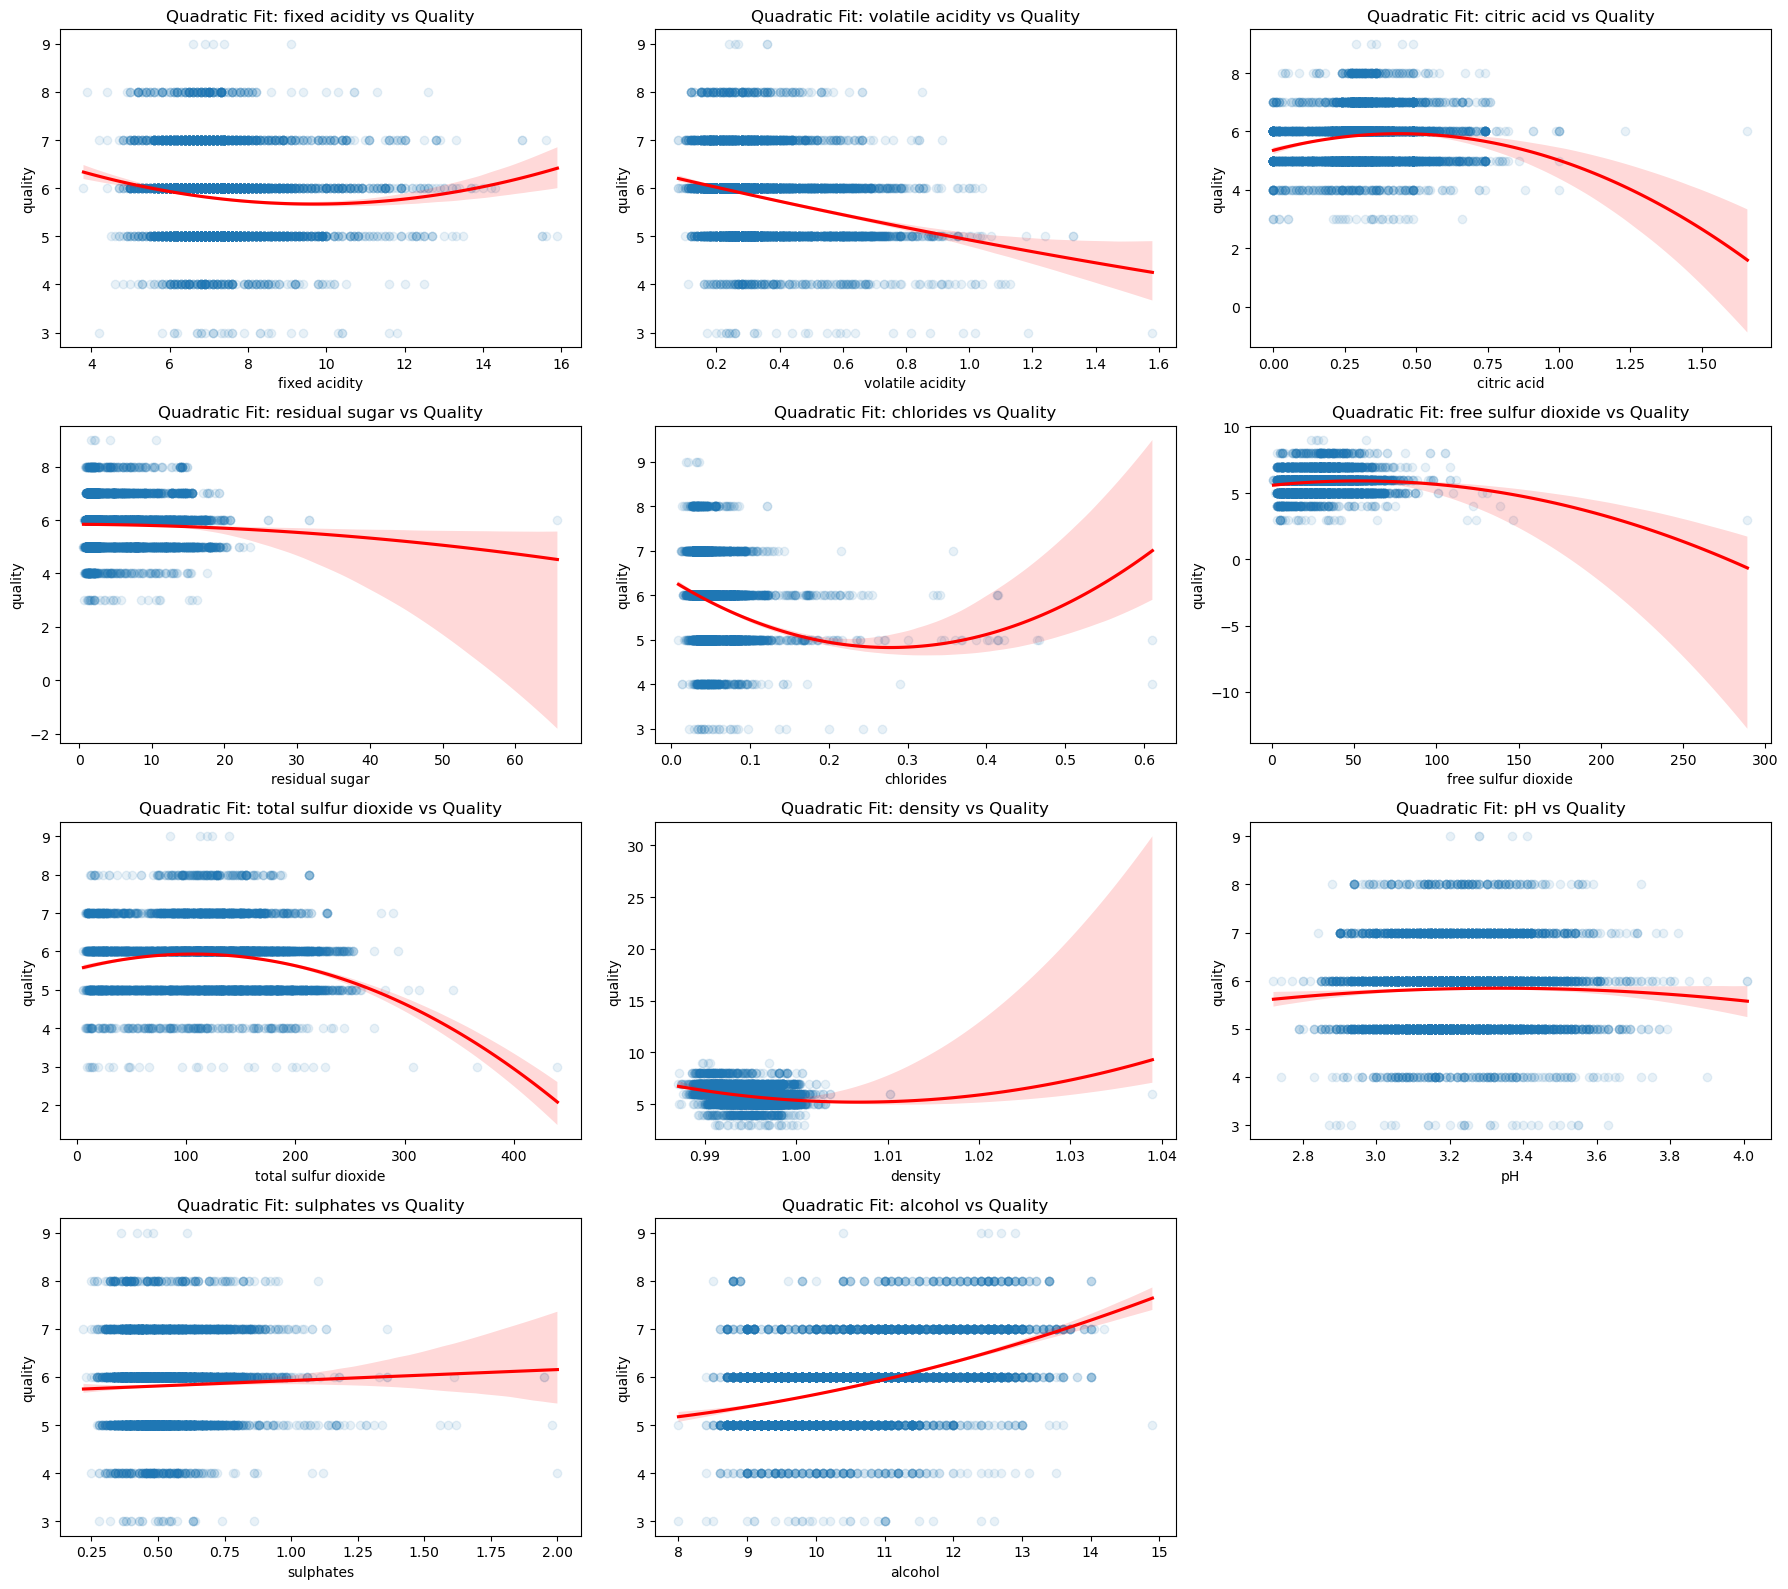

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

cols_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                 'density', 'pH', 'sulphates', 'alcohol']

# Calculate required rows (we'll fix columns at 3)
n_cols = 3
n_rows = math.ceil(len(cols_to_check) / n_cols)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# .flatten() converts the 2D array of axes [[ax1, ax2, ax3], [ax4...]] 
# into a simple 1D list [ax1, ax2, ax3, ax4...] so we can just use axes[i]
axes = axes.flatten()

for i, col in enumerate(cols_to_check):
    sns.regplot(ax=axes[i], x=col, y='quality', data=df, 
                scatter_kws={'alpha':0.1}, 
                line_kws={'color':'red'}, 
                order=2) # Order 2 for polynomial (parabola) fit
    axes[i].set_title(f"Quadratic Fit: {col} vs Quality")

# Remove any empty subplots (e.g., if we have 12 spots but only 11 vars)
for i in range(len(cols_to_check), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

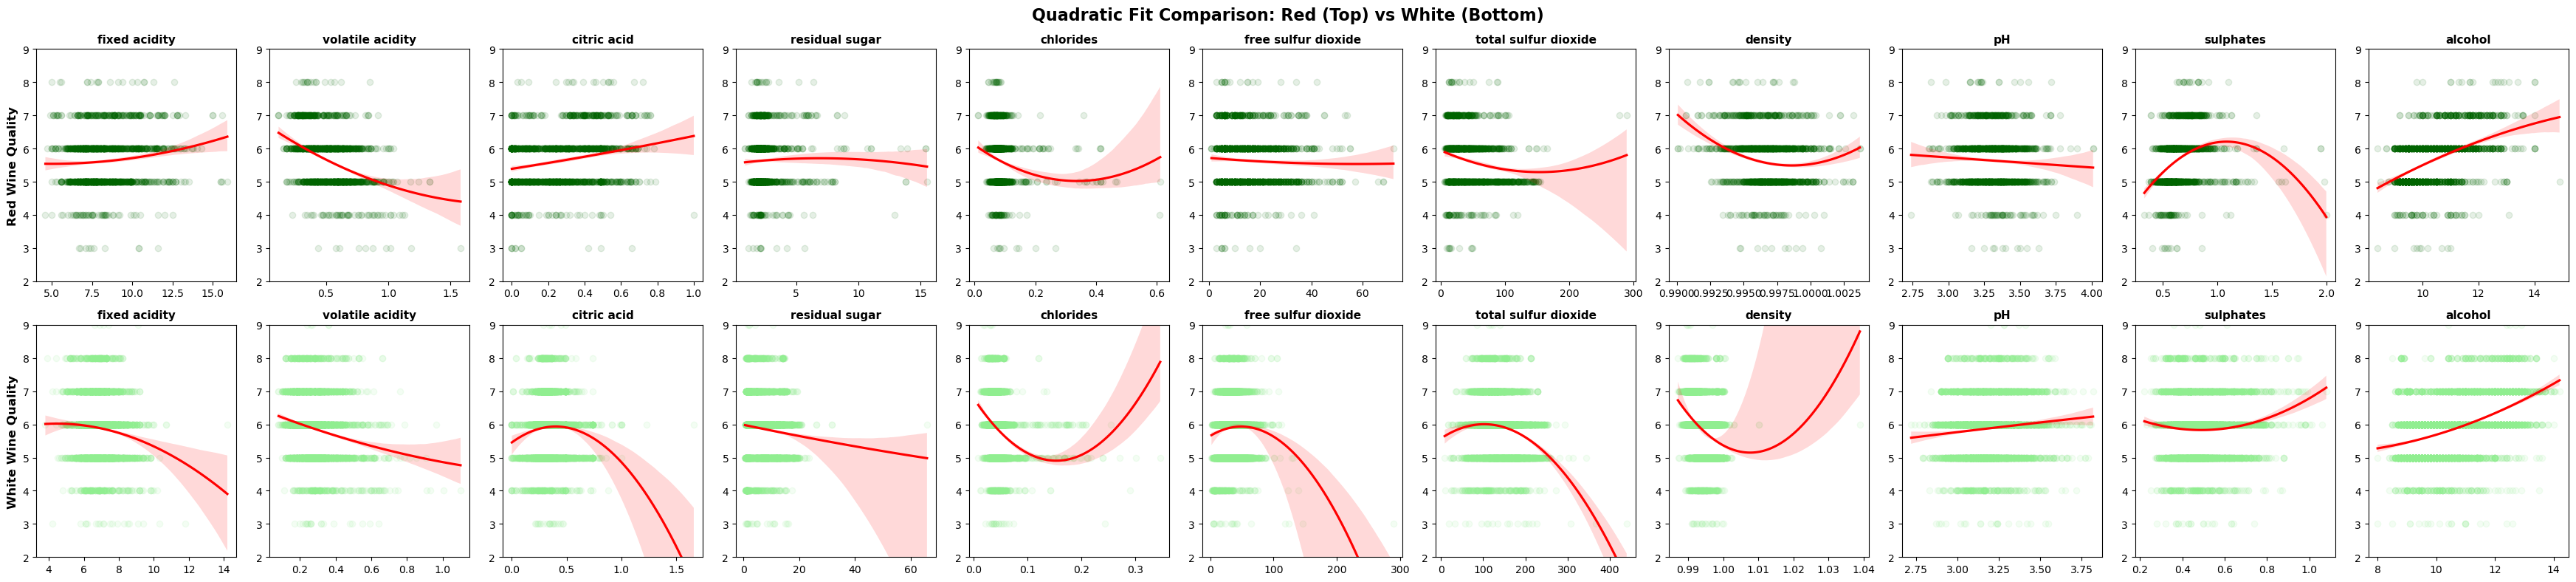

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the columns and datasets
cols_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                 'density', 'pH', 'sulphates', 'alcohol']

df_red = df[df['type'] == 'red']
df_white = df[df['type'] == 'white']

# 2. Create a Wide Grid (2 Rows x 11 Columns)
# We remove sharey='row' to manually control the limits
fig, axes = plt.subplots(2, 11, figsize=(35, 8)) 

# 3. Loop through predictors
for i, col in enumerate(cols_to_check):
    
    # --- ROW 1: RED WINE (Dark Green Dots) ---
    sns.regplot(
        ax=axes[0, i], 
        x=col, 
        y='quality', 
        data=df_red, 
        scatter_kws={'alpha': 0.1, 'color': 'darkgreen'}, 
        line_kws={'color': 'red'},                        
        order=2,
        truncate=True  # <--- PREVENTS CURVE EXPLOSION
    )
    
    # Force Y-Axis to logical Wine Quality range (e.g., 2 to 9)
    axes[0, i].set_ylim(2, 9)
    
    axes[0, i].set_title(f"{col}", fontsize=11, fontweight='bold')
    axes[0, i].set_xlabel('')
    if i == 0:
        axes[0, i].set_ylabel('Red Wine Quality', fontsize=12, fontweight='bold')
    else:
        axes[0, i].set_ylabel('')

    # --- ROW 2: WHITE WINE (Light Green Dots) ---
    sns.regplot(
        ax=axes[1, i], 
        x=col, 
        y='quality', 
        data=df_white, 
        scatter_kws={'alpha': 0.1, 'color': 'lightgreen'}, 
        line_kws={'color': 'red'},                         
        order=2,
        truncate=True  # <--- PREVENTS CURVE EXPLOSION
    )
    
    # Force Y-Axis to logical Wine Quality range (e.g., 2 to 9)
    # This fixes the "scaled" issue you saw (the -10 to 30 range)
    axes[1, i].set_ylim(2, 9)

    axes[1, i].set_title(f"{col}", fontsize=11, fontweight='bold')
    axes[1, i].set_xlabel('')
    if i == 0:
        axes[1, i].set_ylabel('White Wine Quality', fontsize=12, fontweight='bold')
    else:
        axes[1, i].set_ylabel('')

plt.suptitle("Quadratic Fit Comparison: Red (Top) vs White (Bottom)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

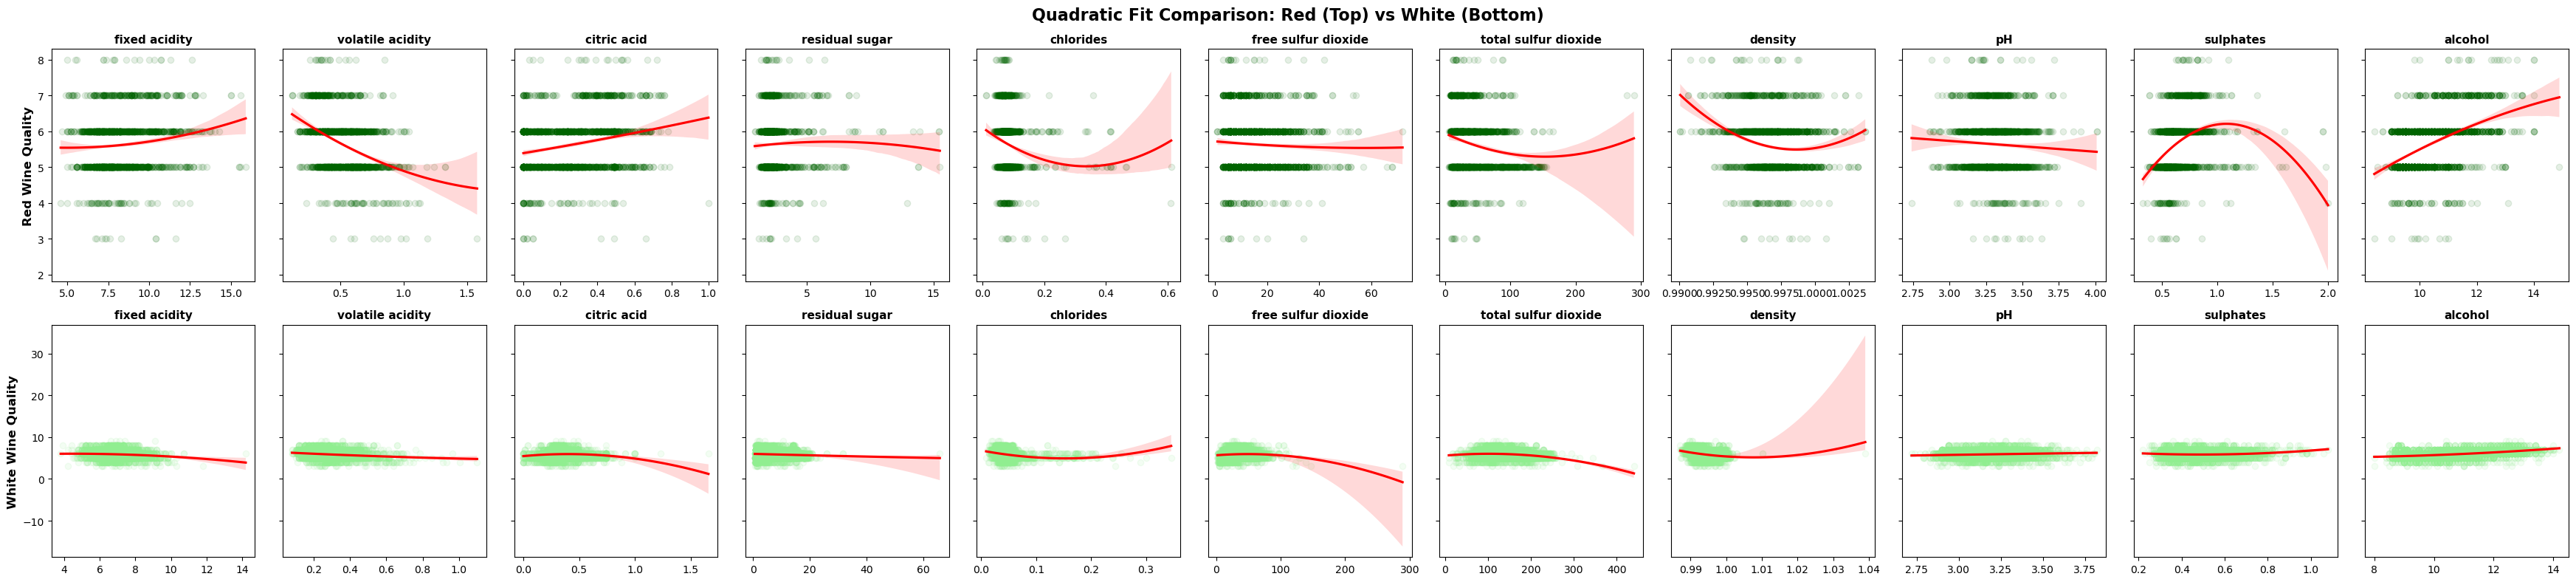

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define the columns and datasets
cols_to_check = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                 'density', 'pH', 'sulphates', 'alcohol']

df_red = df[df['type'] == 'red']
df_white = df[df['type'] == 'white']

# 2. Create a Wide Grid (2 Rows x 11 Columns)
# figsize width is 35 to accommodate 11 plots side-by-side
fig, axes = plt.subplots(2, 11, figsize=(35, 8), sharey='row') 

# 3. Loop through predictors
for i, col in enumerate(cols_to_check):
    
    # --- ROW 1: RED WINE (Dark Green Dots) ---
    sns.regplot(
        ax=axes[0, i], 
        x=col, 
        y='quality', 
        data=df_red, 
        scatter_kws={'alpha': 0.1, 'color': 'darkgreen'}, # Dark Green for Red Wine
        line_kws={'color': 'red'},                        # Red Line (Standard)
        order=2                                           # Quadratic Fit
    )
    axes[0, i].set_title(f"{col}", fontsize=11, fontweight='bold')
    axes[0, i].set_xlabel('')
    if i == 0:
        axes[0, i].set_ylabel('Red Wine Quality', fontsize=12, fontweight='bold')
    else:
        axes[0, i].set_ylabel('')

    # --- ROW 2: WHITE WINE (Light Green Dots) ---
    sns.regplot(
        ax=axes[1, i], 
        x=col, 
        y='quality', 
        data=df_white, 
        scatter_kws={'alpha': 0.1, 'color': 'lightgreen'}, # Light Green for White Wine
        line_kws={'color': 'red'},                         # Red Line (Standard)
        order=2                                            # Quadratic Fit
    )
    axes[1, i].set_title(f"{col}", fontsize=11, fontweight='bold')
    axes[1, i].set_xlabel('')
    if i == 0:
        axes[1, i].set_ylabel('White Wine Quality', fontsize=12, fontweight='bold')
    else:
        axes[1, i].set_ylabel('')

plt.suptitle("Quadratic Fit Comparison: Red (Top) vs White (Bottom)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\a_gal\AppData\Local\Temp\ipykernel_13056\2584173546.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=comparison_df['Spearman'], y=comparison_df.index, palette=colors_spearman)
C:\Users\a_gal\AppData\Local\Temp\ipykernel_13056\2584173546.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=comparison_df['Poly_R2'], y=comparison_df.index, palette=colors_r2)


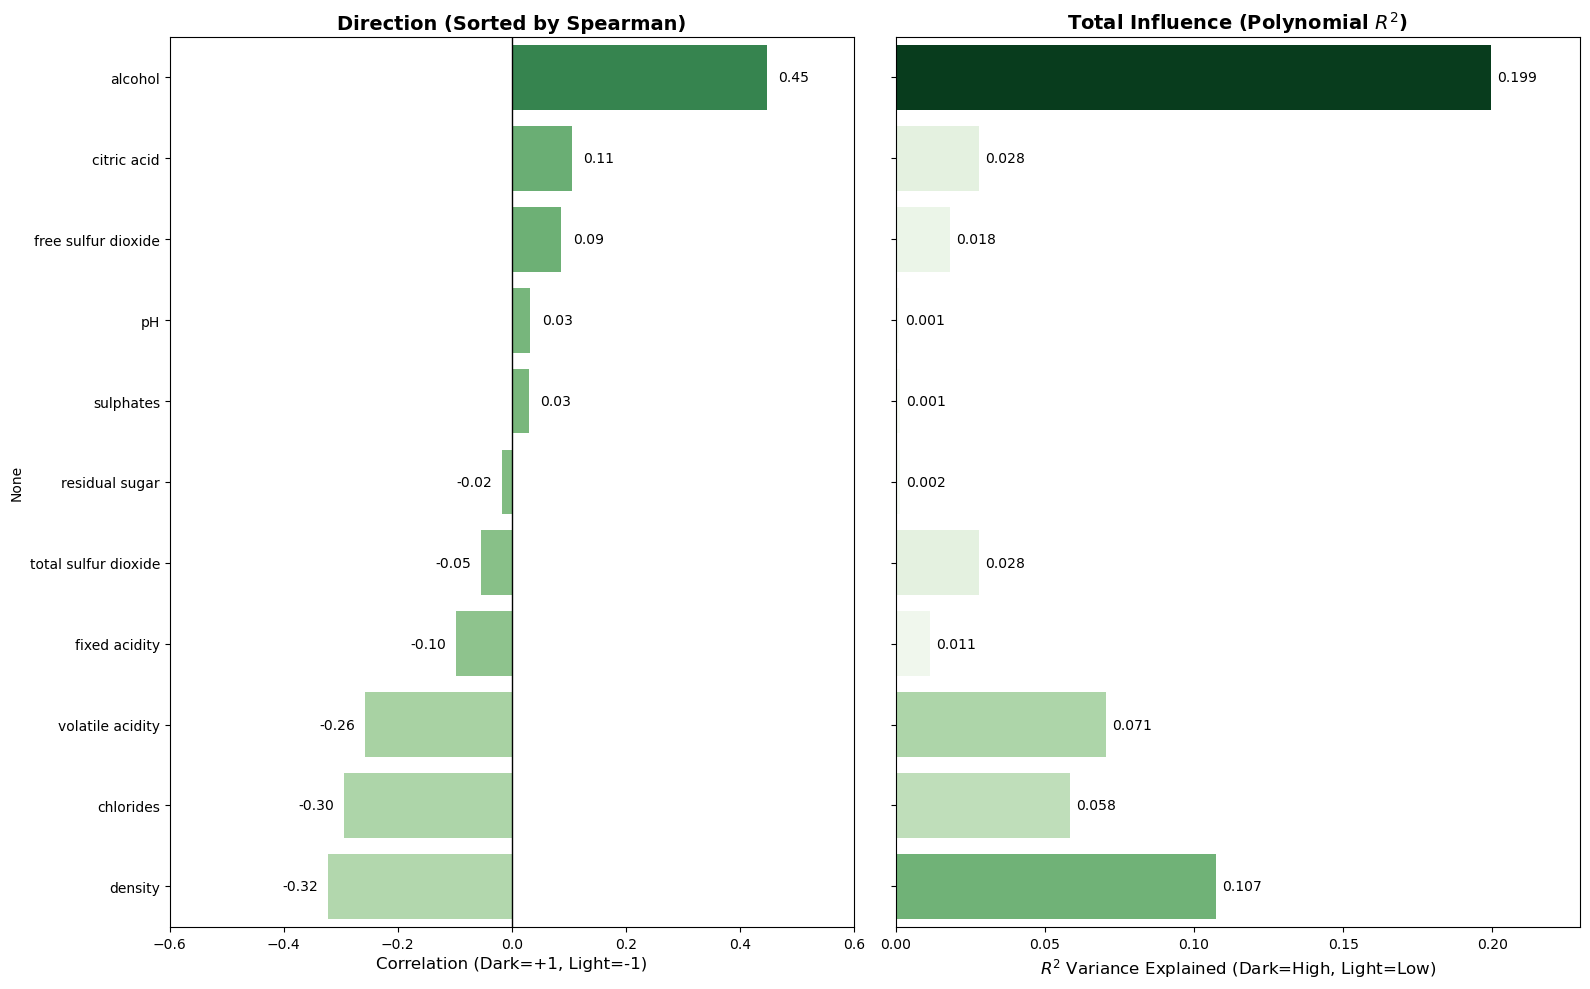

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statsmodels.api as sm

# 1. Prepare Data
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
predictors = [col for col in numeric_cols if col != 'quality']

# A. Calculate Spearman
spearman_data = df[numeric_cols].corr(method='spearman')['quality'].drop('quality')

# B. Calculate Polynomial R2 (Quadratic)
r2_data = {}
for var in predictors:
    X = df[[var]].copy()
    X['sq'] = X[var] ** 2
    X = sm.add_constant(X)
    model = sm.OLS(df['quality'], X).fit()
    r2_data[var] = model.rsquared

# 2. Combine into one DataFrame
comparison_df = pd.DataFrame({
    'Spearman': spearman_data,
    'Poly_R2': pd.Series(r2_data)
})

# --- SORTING STRATEGY CHANGED ---
# Sort by Spearman Correlation (Descending: Positive -> Negative)
comparison_df = comparison_df.sort_values(by='Spearman', ascending=False)

# 3. Setup Colors
# We use the 'Greens' colormap
cmap = plt.get_cmap("Greens")

# Normalize Spearman: -1 maps to 0.0 (Light), +1 maps to 1.0 (Dark)
norm_spearman = mcolors.Normalize(vmin=-1, vmax=1)
colors_spearman = [cmap(norm_spearman(val)) for val in comparison_df['Spearman']]

# Normalize R2: 0 maps to 0.0 (Light). 
# Note: Since your max R2 is ~0.2, if we mapped 1.0 to Dark, the bars would be too pale to see.
# I mapped the Data's Maximum R2 to "Dark Green" so the chart is readable.
norm_r2 = mcolors.Normalize(vmin=0, vmax=comparison_df['Poly_R2'].max())
colors_r2 = [cmap(norm_r2(val)) for val in comparison_df['Poly_R2']]

# 4. Create Side-by-Side Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# --- LEFT PLOT: Spearman (Direction) ---
sns.barplot(ax=axes[0], x=comparison_df['Spearman'], y=comparison_df.index, palette=colors_spearman)
axes[0].set_title('Direction (Sorted by Spearman)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Correlation (Dark=+1, Light=-1)', fontsize=12)
axes[0].axvline(0, color='black', linewidth=1)
axes[0].set_xlim(-0.6, 0.6)

# Add values to bars
for i, v in enumerate(comparison_df['Spearman']):
    offset = 0.02 if v >= 0 else -0.08
    axes[0].text(v + offset, i, f"{v:.2f}", color='black', va='center')

# --- RIGHT PLOT: Polynomial R2 (Magnitude) ---
sns.barplot(ax=axes[1], x=comparison_df['Poly_R2'], y=comparison_df.index, palette=colors_r2)
axes[1].set_title('Total Influence (Polynomial $R^2$)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('$R^2$ Variance Explained (Dark=High, Light=Low)', fontsize=12)
axes[1].set_xlim(0, comparison_df['Poly_R2'].max() * 1.15)

# Add values to bars
for i, v in enumerate(comparison_df['Poly_R2']):
    axes[1].text(v + 0.002, i, f"{v:.3f}", color='black', va='center')

plt.tight_layout()
plt.show()

C:\Users\a_gal\AppData\Local\Temp\ipykernel_13056\747955453.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax_sp, x=data['Spearman'], y=data.index, palette=colors_sp)
C:\Users\a_gal\AppData\Local\Temp\ipykernel_13056\747955453.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax_r2, x=data['Poly_R2'], y=data.index, palette=colors_r2)
C:\Users\a_gal\AppData\Local\Temp\ipykernel_13056\747955453.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax_sp, x=data['Spearman'], y=data.index, palette=colors_sp)
C:\Users\a_gal\AppDa

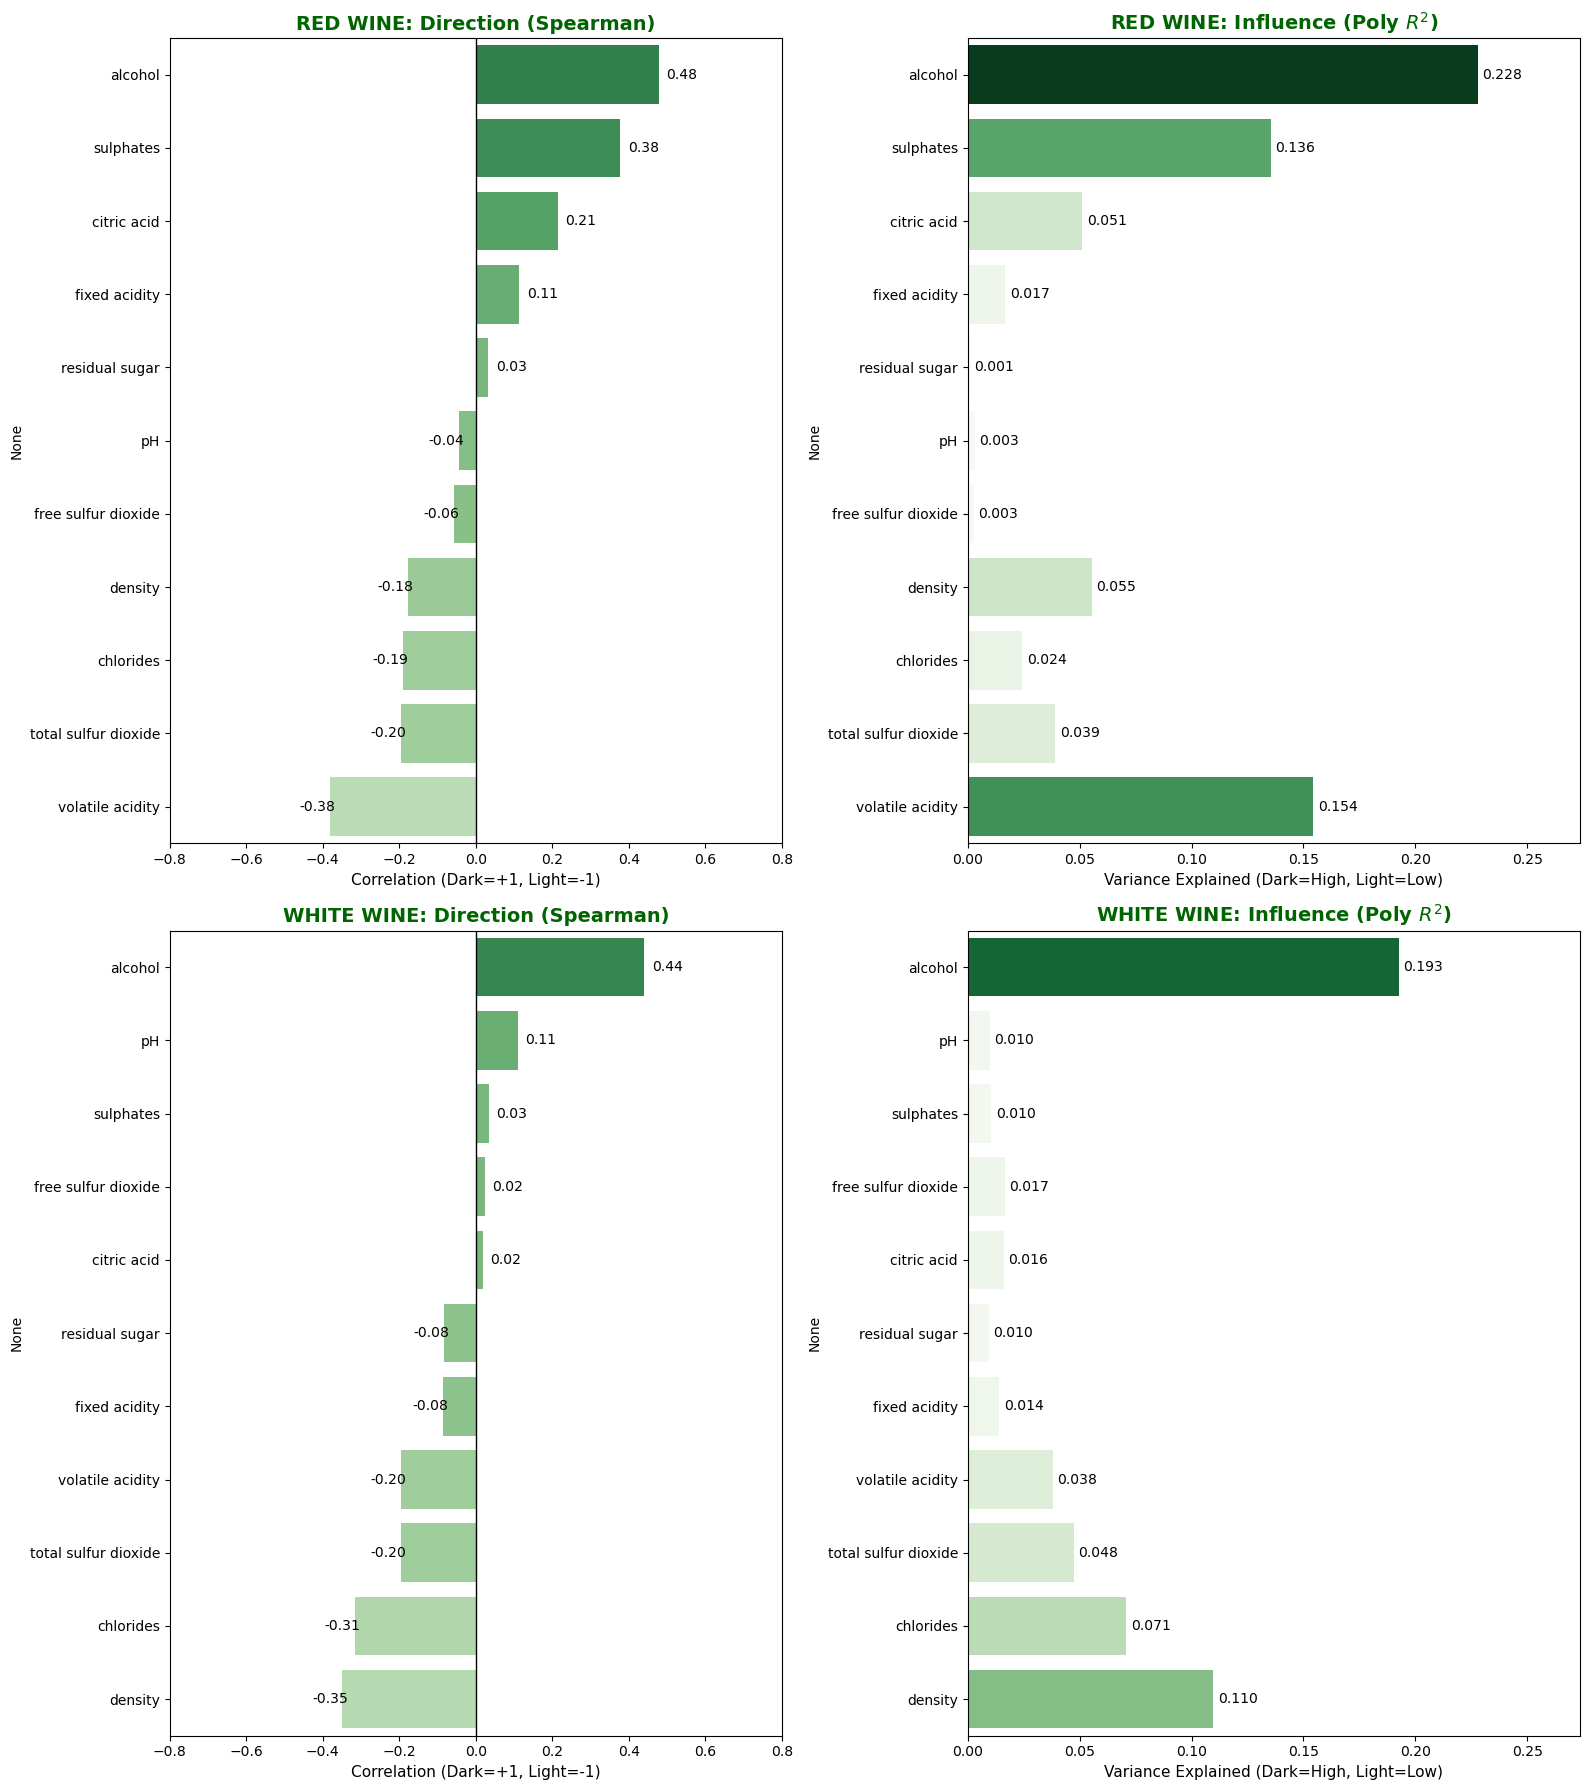

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statsmodels.api as sm

# --- 1. Helper Function to Calculate Metrics ---
def get_wine_metrics(sub_df):
    # Select numeric columns
    numeric_cols = sub_df.select_dtypes(include=['float64', 'int64']).columns
    predictors = [col for col in numeric_cols if col != 'quality']

    # A. Calculate Spearman
    spearman_data = sub_df[numeric_cols].corr(method='spearman')['quality'].drop('quality')

    # B. Calculate Polynomial R2 (Quadratic)
    r2_data = {}
    for var in predictors:
        X = sub_df[[var]].copy()
        X['sq'] = X[var] ** 2
        X = sm.add_constant(X)
        model = sm.OLS(sub_df['quality'], X).fit()
        r2_data[var] = model.rsquared

    # Combine and Sort by Spearman
    metrics_df = pd.DataFrame({
        'Spearman': spearman_data,
        'Poly_R2': pd.Series(r2_data)
    })
    return metrics_df.sort_values(by='Spearman', ascending=False)

# --- 2. Process Red and White Separately ---
df_red = df[df['type'] == 'red']
df_white = df[df['type'] == 'white']

red_metrics = get_wine_metrics(df_red)
white_metrics = get_wine_metrics(df_white)

# --- 3. Setup Global Color Normalization ---
# We want the color scale to be consistent across both Red and White plots
cmap = plt.get_cmap("Greens")

# Spearman: -1 (Light) to +1 (Dark)
norm_spearman = mcolors.Normalize(vmin=-1, vmax=1)

# R2: 0 (Light) to the Global Maximum R2 found in either dataset (Dark)
global_max_r2 = max(red_metrics['Poly_R2'].max(), white_metrics['Poly_R2'].max())
norm_r2 = mcolors.Normalize(vmin=0, vmax=global_max_r2)

# --- 4. Plotting (2 Rows x 2 Cols) ---
fig, axes = plt.subplots(2, 2, figsize=(16, 18))

# Define the pairs to plot: (Data, Title, Row Index)
datasets = [
    (red_metrics, "RED WINE", 0),
    (white_metrics, "WHITE WINE", 1)
]

for data, title, row in datasets:
    # Generates colors for this specific dataset based on the global norm
    colors_sp = [cmap(norm_spearman(val)) for val in data['Spearman']]
    colors_r2 = [cmap(norm_r2(val)) for val in data['Poly_R2']]
    
    # --- LEFT COL: Spearman ---
    ax_sp = axes[row, 0]
    sns.barplot(ax=ax_sp, x=data['Spearman'], y=data.index, palette=colors_sp)
    
    ax_sp.set_title(f'{title}: Direction (Spearman)', fontsize=14, fontweight='bold', color='darkgreen')
    ax_sp.set_xlabel('Correlation (Dark=+1, Light=-1)', fontsize=11)
    ax_sp.axvline(0, color='black', linewidth=1)
    ax_sp.set_xlim(-0.8, 0.8) # Fixed range for easy comparison
    
    # Annotate Spearman
    for i, v in enumerate(data['Spearman']):
        offset = 0.02 if v >= 0 else -0.08
        ax_sp.text(v + offset, i, f"{v:.2f}", color='black', va='center')

    # --- RIGHT COL: Polynomial R2 ---
    ax_r2 = axes[row, 1]
    sns.barplot(ax=ax_r2, x=data['Poly_R2'], y=data.index, palette=colors_r2)
    
    ax_r2.set_title(f'{title}: Influence (Poly $R^2$)', fontsize=14, fontweight='bold', color='darkgreen')
    ax_r2.set_xlabel('Variance Explained (Dark=High, Light=Low)', fontsize=11)
    ax_r2.set_xlim(0, global_max_r2 * 1.2) # Consistent scale based on global max
    
    # Annotate R2
    for i, v in enumerate(data['Poly_R2']):
        ax_r2.text(v + 0.002, i, f"{v:.3f}", color='black', va='center')

plt.tight_layout()
plt.show()

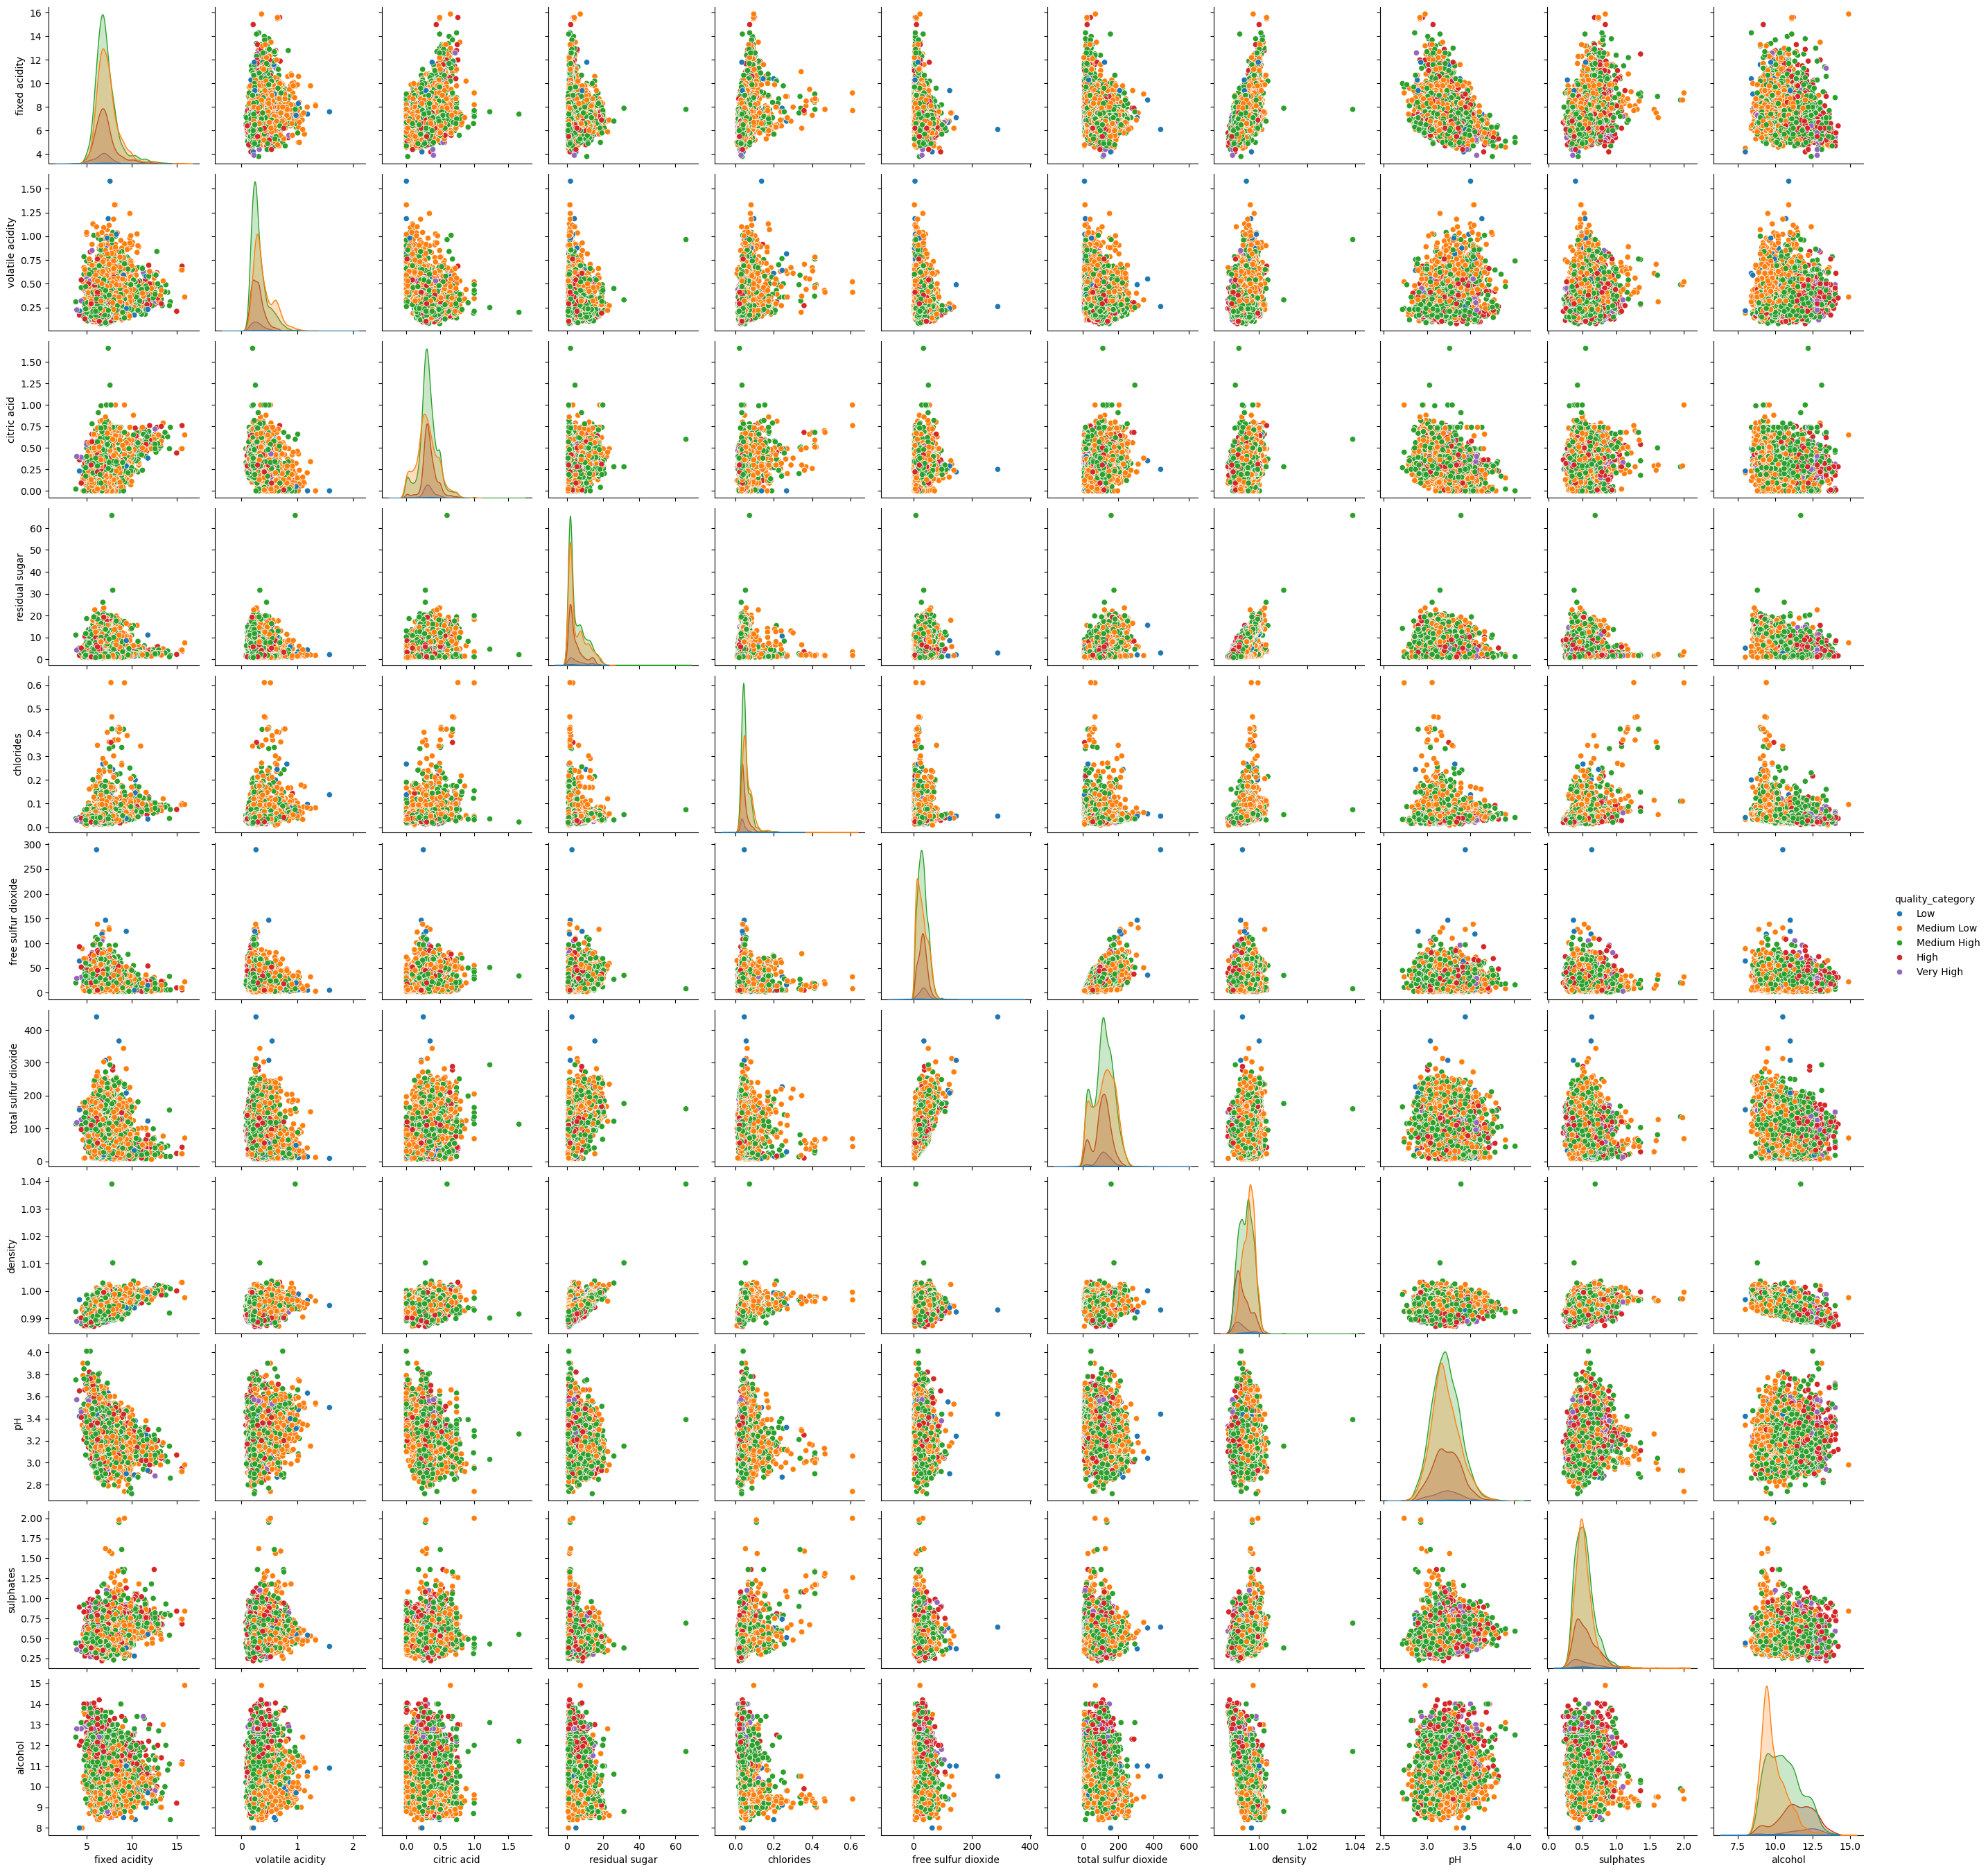

In [22]:
df_dropquality = df.drop (columns = 'quality')
sns.pairplot(df_dropquality, hue="quality_category")
plt.show()

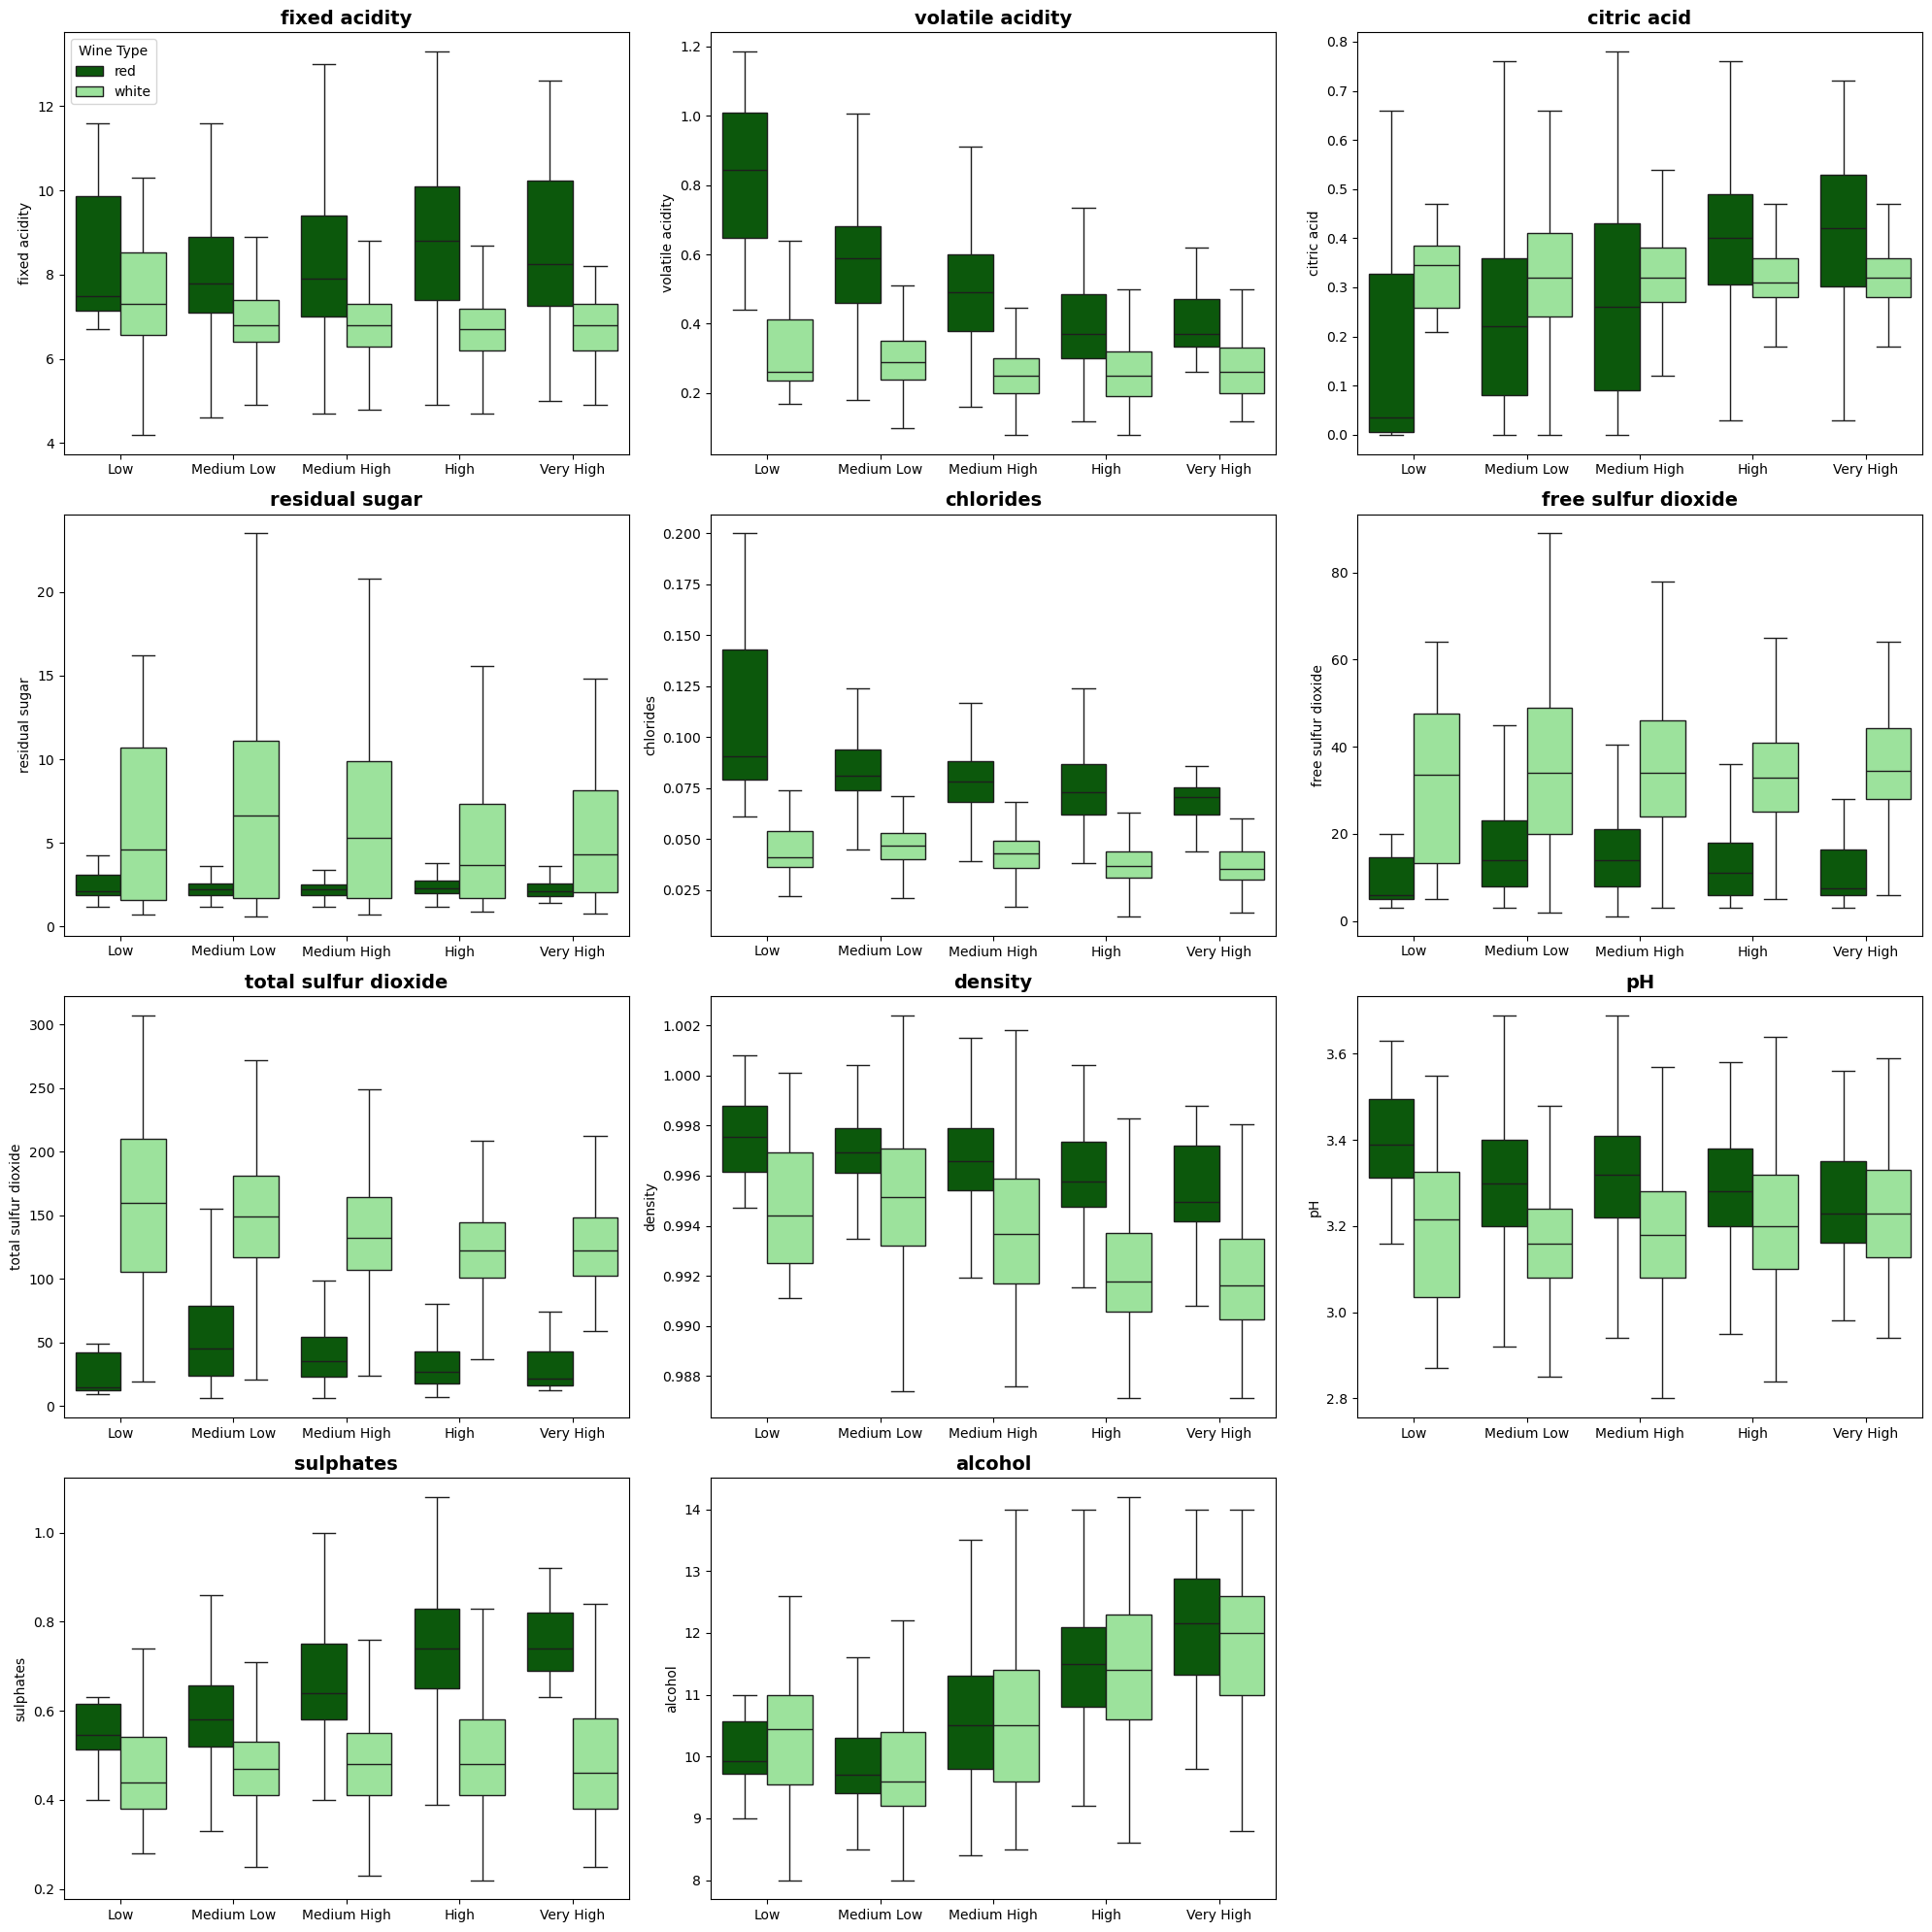

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 1. Identify numerical columns to plot 
# We exclude 'quality' (target) and ensure we don't try to plot the categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
cols_to_plot = [col for col in numeric_cols if col != 'quality']

# 2. Setup the Grid (3 columns wide)
n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

# 3. Define Your Custom Colors
# Red Wine -> Dark Green
# White Wine -> Light Green
wine_colors = {'red': 'darkgreen', 'white': 'lightgreen'}

# 4. Loop through every predictor
for i, col in enumerate(cols_to_plot):
    sns.boxplot(
        ax=axes[i],
        data=df,
        x='quality_category',   # Group by Quality Category
        y=col,                  # The chemical variable
        hue='type',             # Split by Wine Type
        palette=wine_colors,
        showfliers=False        # Hiding extreme outliers makes the "Box" trends easier to see
    )
    
    axes[i].set_title(f'{col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('') 
    
    # Only show the legend on the first plot to keep it clean
    if i == 0:
        axes[i].legend(title='Wine Type')
    else:
        axes[i].legend_.remove()

# 5. Remove empty subplots
for i in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [29]:
df['quality_category'].unique()

['Medium Low', 'Medium High', 'High', 'Very High', 'Low']
Categories (5, object): ['Low' < 'Medium Low' < 'Medium High' < 'High' < 'Very High']

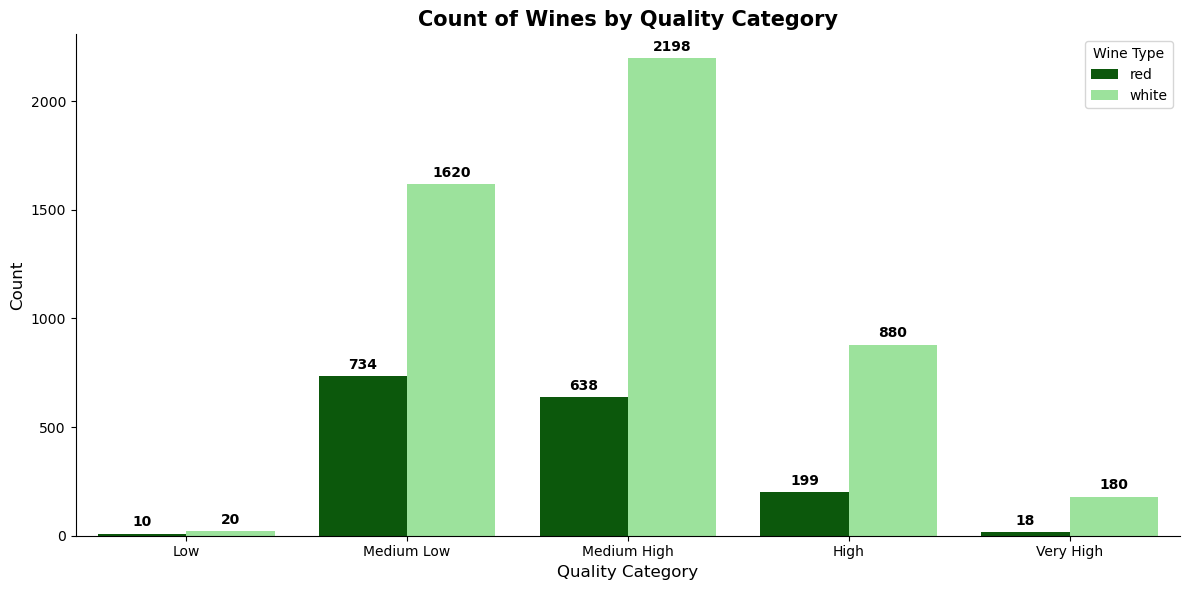

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Setup the specific color palette
wine_colors = {'red': 'darkgreen', 'white': 'lightgreen'}

# 2. Define the CORRECT logical order for your 5 categories
# We order them from Worst -> Best so the X-axis makes sense
order_cat = ['Low', 'Medium Low', 'Medium High', 'High', 'Very High']

# 3. Create the Count Plot
plt.figure(figsize=(12, 6))

ax = sns.countplot(
    data=df, 
    x='quality_category', 
    hue='type', 
    palette=wine_colors, 
    order=order_cat  # This ensures all 5 appear in the right order
)

# 4. Add Labels and Aesthetics
plt.title("Count of Wines by Quality Category", fontsize=15, fontweight='bold')
plt.xlabel("Quality Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title='Wine Type')

# 5. Add the exact numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fontweight='bold')

sns.despine()
plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# List to store ANOVA results
anova_results = []

for var in predictors:
    # We rename columns with spaces to underscores for the formula to work
    formula = f"quality ~ Q('{var}') * type"
    
    # Fit the Linear Model
    model = ols(formula, data=df).fit()
    
    # Run ANOVA
    # Type 2 ANOVA is standard for unbalanced designs (different count of red/white)
    aov_table = sm.stats.anova_lm(model, typ=2)
    
    # Extract the Interaction P-Value (The last row usually, or specifically the interaction row)
    # The index will look like "Q('fixed acidity'):type"
    interaction_index = [idx for idx in aov_table.index if ':' in idx][0]
    p_val = aov_table.loc[interaction_index, 'PR(>F)']
    
    anova_results.append({
        'Predictor': var,
        'Interaction P-Value': p_val,
        'Behavior': "DIFFERENT" if p_val < 0.05 else "Same"
    })

# Create DataFrame and Sort
anova_df = pd.DataFrame(anova_results).sort_values(by='Interaction P-Value')

# Display nicely
print("Statistical Test for Behavioral Differences (ANOVA Interaction):")
print("-" * 60)
print(anova_df.to_string(formatters={'Interaction P-Value': '{:.5f}'.format}))

Statistical Test for Behavioral Differences (ANOVA Interaction):
------------------------------------------------------------
               Predictor Interaction P-Value   Behavior
0          fixed acidity             0.00000  DIFFERENT
4              chlorides             0.00000  DIFFERENT
2            citric acid             0.00000  DIFFERENT
8                     pH             0.00000  DIFFERENT
9              sulphates             0.00000  DIFFERENT
10               alcohol             0.01991  DIFFERENT
5    free sulfur dioxide             0.04855  DIFFERENT
3         residual sugar             0.10865       Same
7                density             0.16949       Same
6   total sulfur dioxide             0.20343       Same
1       volatile acidity             0.76260       Same


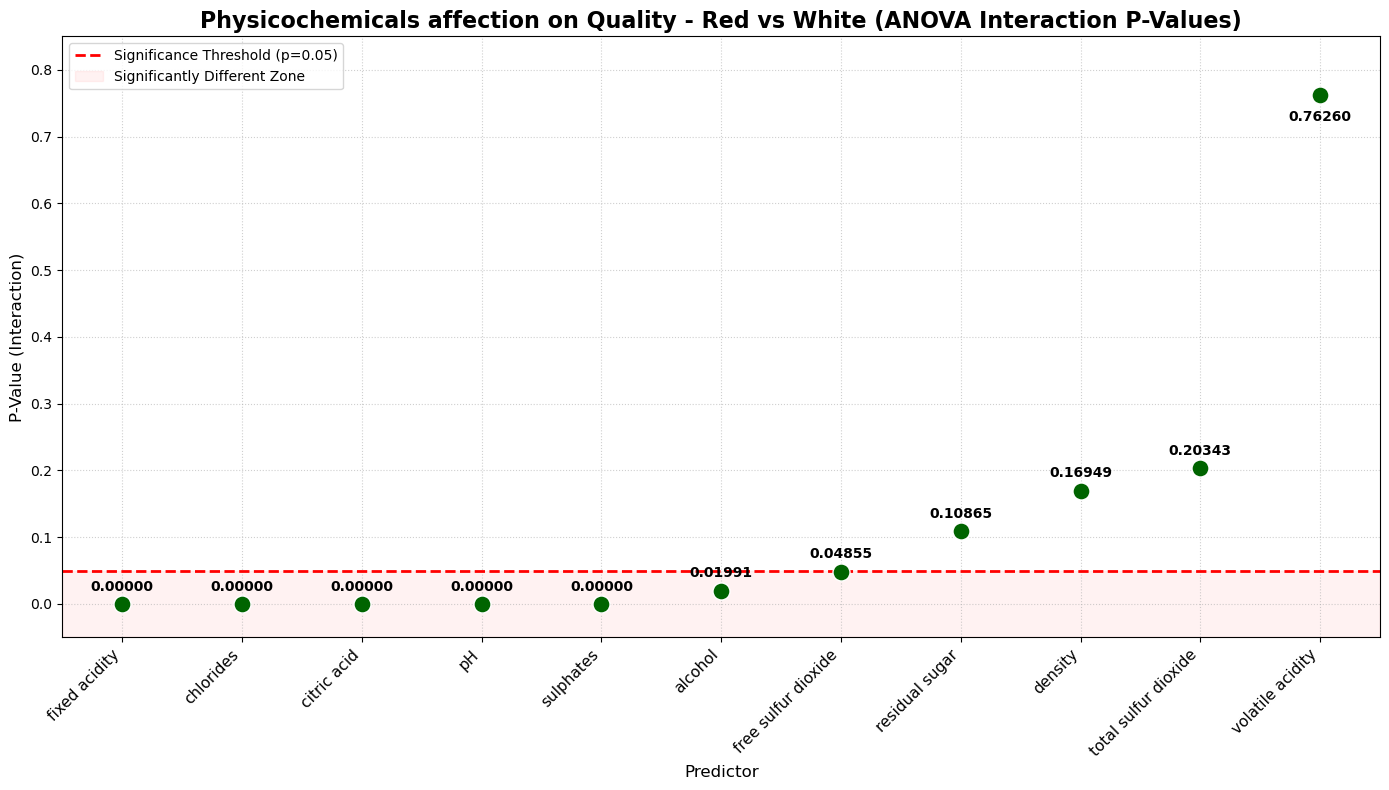

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Ensure we are using the sorted dataframe from the previous step
# (Assuming 'anova_df' is already created and sorted by P-Value from the previous code block)
# We reset the index so the x-axis logic works perfectly for the loop
plot_data = anova_df.reset_index(drop=True)

# 2. Setup Figure
plt.figure(figsize=(14, 8))

# 3. Create Scatter Plot
sns.scatterplot(
    data=plot_data, 
    x='Predictor', 
    y='Interaction P-Value', 
    color='darkgreen', 
    s=150,  # Size of the dots
    zorder=5 # Ensures dots are on top of the grid lines
)

# 4. Add the Red Threshold Line at 0.05
plt.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Significance Threshold (p=0.05)')

# 5. Add Text Labels for every point
for i in range(len(plot_data)):
    p_val = plot_data.loc[i, 'Interaction P-Value']
    
    # Conditional positioning: 
    # If the point is very low (near 0), put text slightly above it.
    # If the point is high, put text slightly below it.
    offset = 0.02 if p_val < 0.7 else -0.04
    
    plt.text(
        x=i,               # The x-coordinate (0, 1, 2...) matches the categorical axis
        y=p_val + offset,  # The y-coordinate with offset
        s=f"{p_val:.5f}",  # The text string
        color='black',
        fontsize=10,
        ha='center',       # Horizontal Alignment: Center
        fontweight='bold'
    )

# 6. Formatting
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.title("Physicochemicals affection on Quality - Red vs White (ANOVA Interaction P-Values)", fontsize=16, fontweight='bold')
plt.ylabel("P-Value (Interaction)", fontsize=12)
plt.xlabel("Predictor", fontsize=12)

# Optional: Shade the "Different" area slightly to make it intuitive
plt.axhspan(-0.05, 0.05, color='red', alpha=0.05, label='Significantly Different Zone')

plt.legend(loc='upper left')
plt.ylim(-0.05, 0.85) # Set limits so labels fit nicely
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

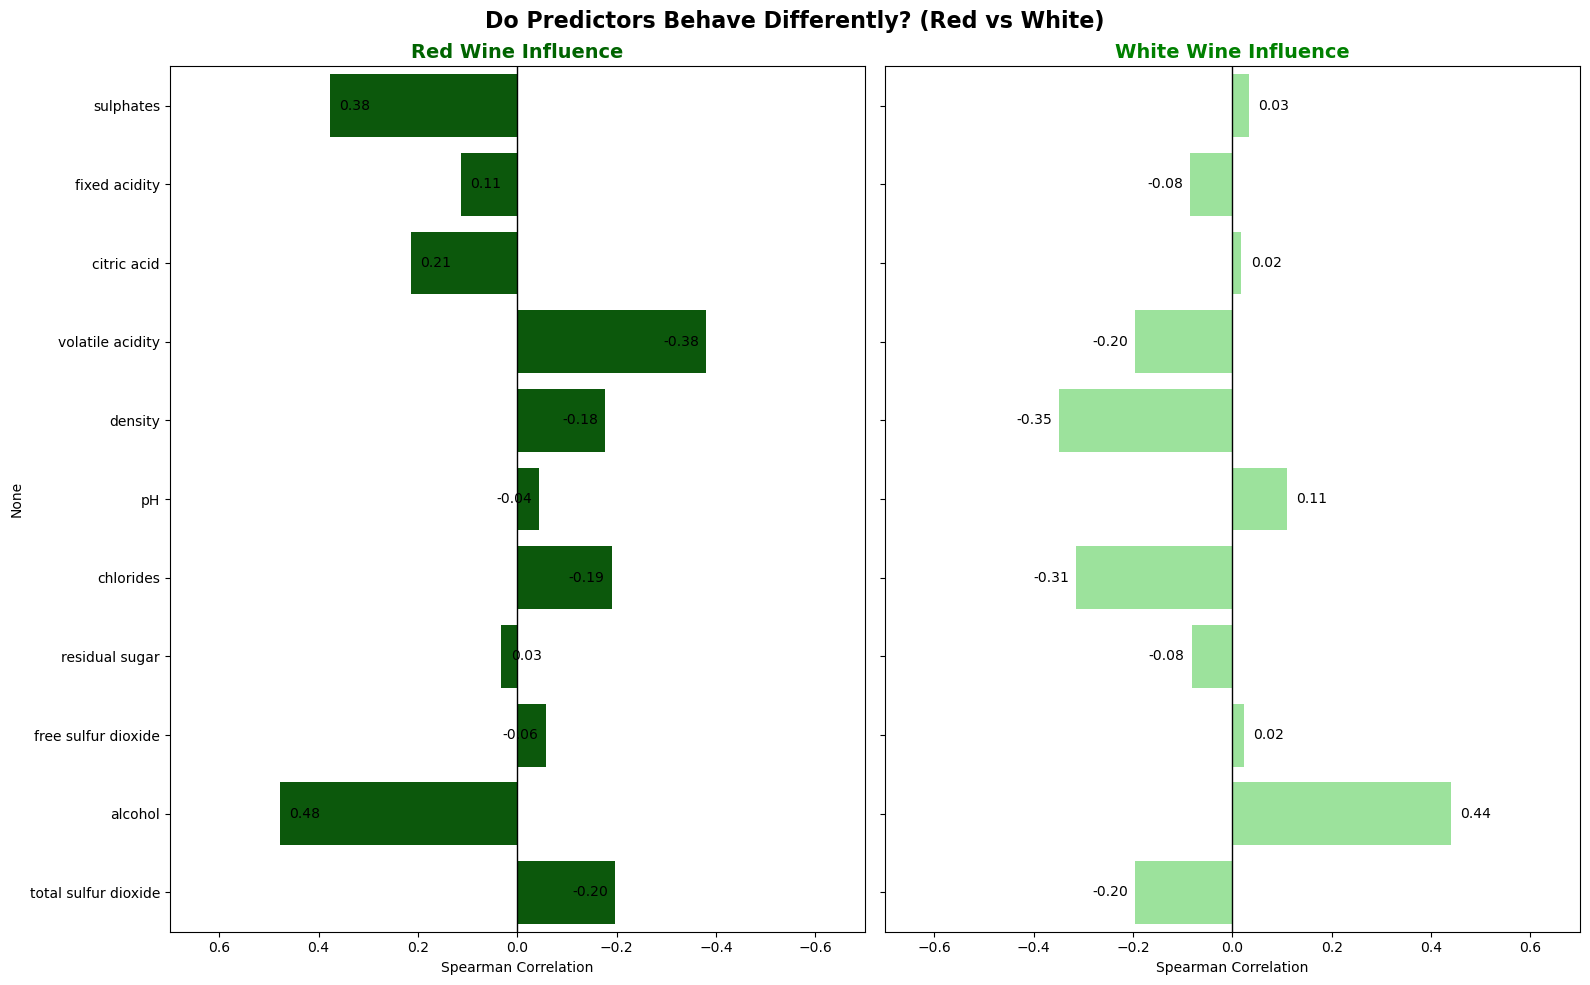

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Prepare Data Split by Type
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
predictors = [col for col in numeric_cols if col != 'quality']

# Calculate Spearman separately
corrs_red = df[df['type'] == 'red'][numeric_cols].corr(method='spearman')['quality'].drop('quality')
corrs_white = df[df['type'] == 'white'][numeric_cols].corr(method='spearman')['quality'].drop('quality')

# Combine into one DataFrame
comp_type = pd.DataFrame({
    'Red_Spearman': corrs_red,
    'White_Spearman': corrs_white
})

# Add a "Difference" column for sorting (Big gap = Different behavior)
comp_type['Diff_Abs'] = abs(comp_type['Red_Spearman'] - comp_type['White_Spearman'])
comp_type = comp_type.sort_values(by='Diff_Abs', ascending=False)

# 2. Plotting Side-by-Side (Butterfly Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# --- LEFT PLOT: RED WINE (Dark Green) ---
sns.barplot(
    ax=axes[0], 
    x=comp_type['Red_Spearman'], 
    y=comp_type.index, 
    color='darkgreen'
)
axes[0].set_title('Red Wine Influence', fontsize=14, fontweight='bold', color='darkgreen')
axes[0].axvline(0, color='black', linewidth=1)
axes[0].set_xlim(-0.7, 0.7)
axes[0].invert_xaxis()  # Invert so bars grow towards the center
axes[0].set_xlabel('Spearman Correlation')

# Add numbers
for i, v in enumerate(comp_type['Red_Spearman']):
    offset = 0.05 if v < 0 else -0.05 # Adjust text position based on sign (inverted axis)
    axes[0].text(v + offset, i, f"{v:.2f}", color='black', va='center', ha='center')

# --- RIGHT PLOT: WHITE WINE (Light Green) ---
sns.barplot(
    ax=axes[1], 
    x=comp_type['White_Spearman'], 
    y=comp_type.index, 
    color='lightgreen'
)
axes[1].set_title('White Wine Influence', fontsize=14, fontweight='bold', color='green')
axes[1].axvline(0, color='black', linewidth=1)
axes[1].set_xlim(-0.7, 0.7)
axes[1].set_xlabel('Spearman Correlation')
axes[1].set_ylabel('')

# Add numbers
for i, v in enumerate(comp_type['White_Spearman']):
    offset = 0.05 if v >= 0 else -0.05
    axes[1].text(v + offset, i, f"{v:.2f}", color='black', va='center', ha='center')

plt.suptitle("Do Predictors Behave Differently? (Red vs White)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### - White Wine Model -

##### - Data Inspection

In [7]:
print(f"The shape of white_wine is: {white_wine.shape}")
print("------------------")
print(f"Data types of white_wine:\n{white_wine.dtypes}")

The shape of white_wine is: (4898, 13)
------------------
Data types of white_wine:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object


In [8]:
# Checking for missing values in white wine dataset

white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [9]:
# Creating dataframe for white wine

df_white = pd.DataFrame(white_wine)
df_white
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [10]:
bins = [0, 4, 6, 7, 8, 10]
choices = ['Low', 'Medium Low', 'Medium High', 'High', 'Very High']

df_white['quality_category'] = pd.cut(df_white['quality'], bins=bins, labels=choices, right=False)

# Verify the distribution of the new quality categories
print(df_white['quality_category'].value_counts())

quality_category
Medium High    2198
Medium Low     1620
High            880
Very High       180
Low              20
Name: count, dtype: int64


In [ ]:
df_white.info()